# Finch Visualizer

Run the following code block to import the fake finch library, that will draw results as graphics in a Jupyter Notebook.

In [20]:
from finchdraw import Finch

## Example Usage

The following cell draws a simple ∞ sign; putting the `bot` object on the last line shows a visual representation of what it did during its life.

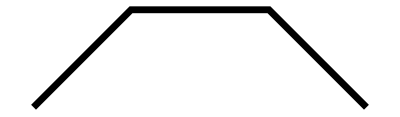

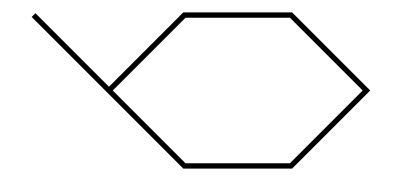

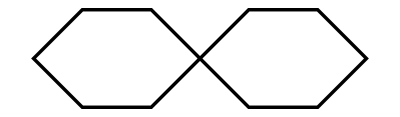

In [21]:
bot = Finch()

bot.setTurn('L', 45, 1)
bot.setMove('F', 10, 1)
bot.setTurn('R', 45, 1)
bot.setMove('F', 10, 1)
bot.setTurn('R', 45, 1)
bot.setMove('F', 10, 1)

bot.show() # Custom command to display the finch progress so far

bot.setTurn('R', 90, 1)
bot.setMove('F', 10, 1)
bot.setTurn('R', 45, 1)
bot.setMove('F', 10, 1)
bot.setTurn('R', 45, 1)
bot.setMove('F', 20, 1)

bot.show()

bot.setTurn('L', 45, 1)
bot.setMove('F', 10, 1)
bot.setTurn('L', 45, 1)
bot.setMove('F', 10, 1)
bot.setTurn('L', 90, 1)
bot.setMove('F', 10, 1)
bot.setTurn('L', 45, 1)
bot.setMove('F', 10, 1)
bot.setTurn('L', 45, 1)
bot.setMove('F', 10, 1)

bot # You can just put the bot as the last line of a cell to display it


## Sine Wave using wheels()

Creating a lateral sine wave by varying the wheel speeds to create smooth curves.


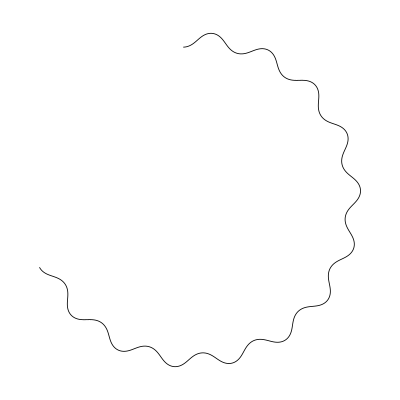

In [22]:
import math

bot = Finch()

# Parameters for the sine wave
wavelength = 40  # cm per complete wave cycle
amplitude = 30   # cm lateral displacement
base_speed = 10  # cm/s forward speed
steps = 500      # number of small time steps

# Time step for smooth curve
dt = 0.1  # seconds per step

for i in range(steps):
    # Calculate the desired turning rate based on sine wave derivative
    # The derivative of sin gives us the rate of change (curvature)
    t = i * dt
    x = (t * base_speed / wavelength) * 2 * math.pi

    # Derivative of sine wave determines the angular velocity needed
    curvature: float = (2 * math.pi * amplitude / wavelength) * math.cos(x)

    # Convert curvature to differential wheel speeds
    # omega (rad/s) = (vr - vl) / wheelbase
    # We want: omega = curvature * base_speed
    omega: float = curvature * base_speed / wavelength

    # Solve for left and right speeds maintaining average forward speed
    # vl + vr = 2 * base_speed
    # vr - vl = omega * wheelbase (10 cm)
    wheelbase: float = 10
    speed_diff: float = omega * wheelbase

    left_speed: float = base_speed - speed_diff / 2
    right_speed: float = base_speed + speed_diff / 2

    bot.wheels(left_speed, right_speed, dt)

    # Bend the sine wave
    bot.setTurn('R', 0.5, 1)


bot

## Wheel Movement

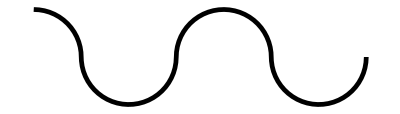

In [23]:
from math import pi
bot = Finch()

bot.wheels(pi, 0, 5)
bot.wheels(0, pi, 10)
bot.wheels(pi, 0, 10)
bot.wheels(0, pi, 10)

bot

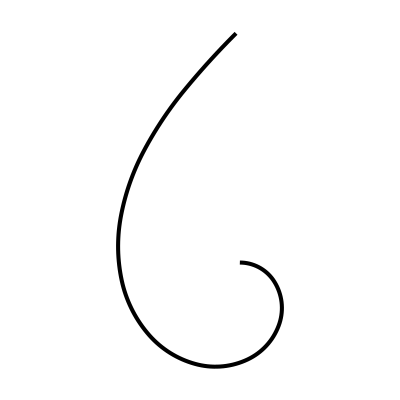

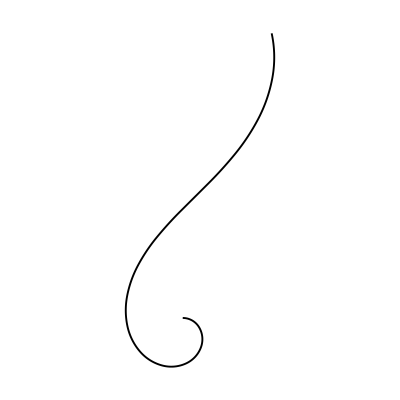

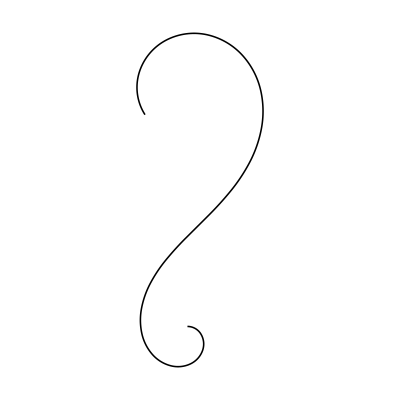

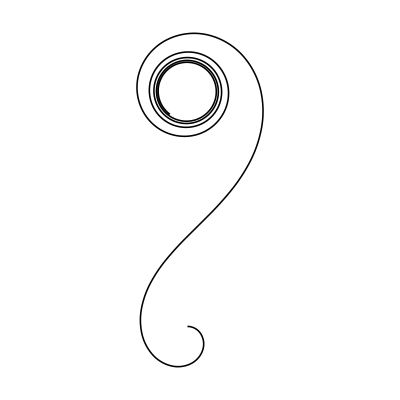

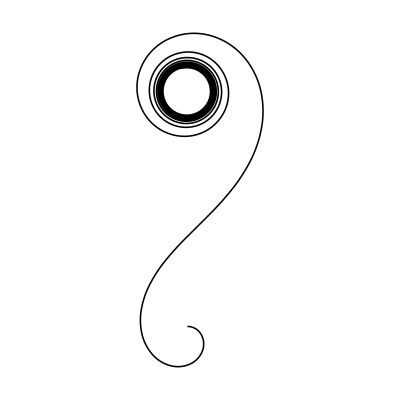

In [24]:

for steps in [10, 15, 20, 35, 50]:
    bot = Finch()
    for i in range(steps):
        bot.wheels(10, i, 1)
    bot.show() # Display this bot's progress

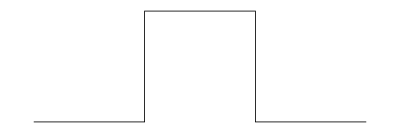

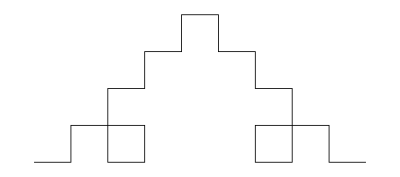

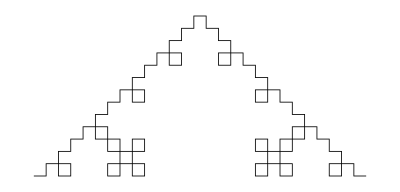

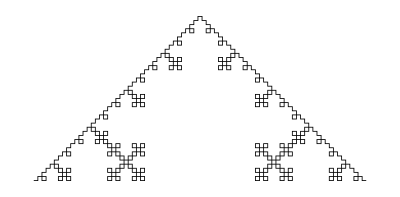

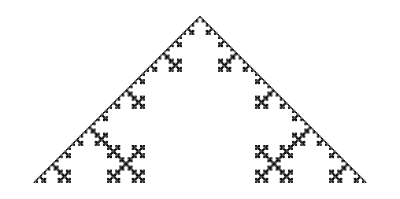

In [ ]:
def top_hat(bot,length: float, steps: int, extrude_factor: float = 0.3333, middle_percent: float = 0.3333):
    if not steps:
        bot.setMove('F', length, 1)
    else:
        middle_length: float = length * middle_percent
        side_lengths: float = (length - middle_length) / 2
        extrude_height: float = length * extrude_factor

        top_hat(bot, side_lengths, steps-1, extrude_factor, middle_percent)

        bot.setTurn('L', 90, 1)
        top_hat(bot, extrude_height, steps-1, extrude_factor, middle_percent)
        bot.setTurn('R', 90, 1)
        top_hat(bot, middle_length, steps-1, extrude_factor, middle_percent)
        bot.setTurn('R', 90, 1)
        top_hat(bot, extrude_height, steps-1, extrude_factor, middle_percent)

        bot.setTurn('L', 90, 1)
        top_hat(bot, side_lengths, steps-1, extrude_factor, middle_percent)

for steps in range(1, 6):
    bot = Finch()
    top_hat(bot, 200, steps)
    bot.show()

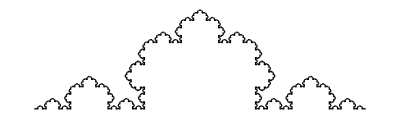

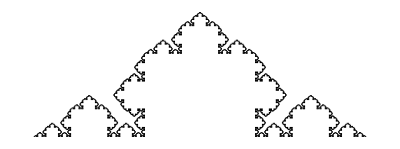

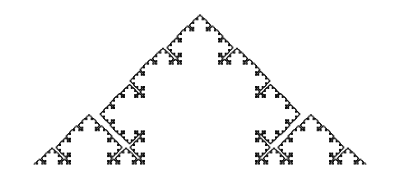

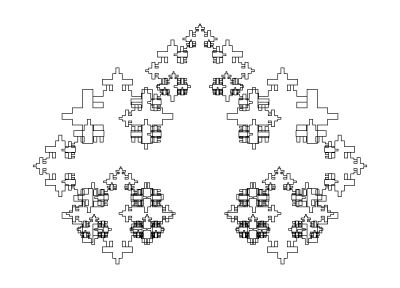

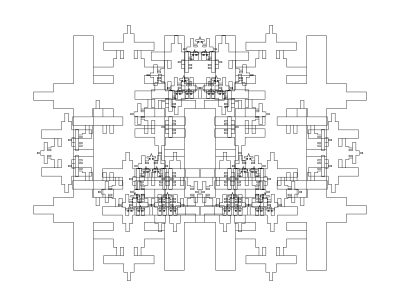

In [37]:
for ef in [0.2, 0.25, 0.3, 0.6, 0.8]:
    bot = Finch()
    top_hat(bot, 200, 5, extrude_factor=ef)
    bot.show()

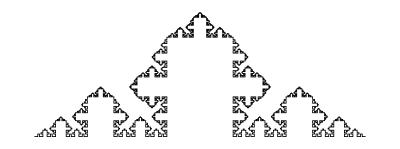

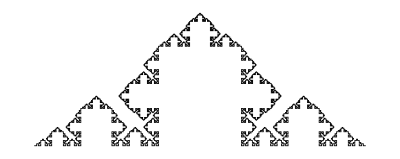

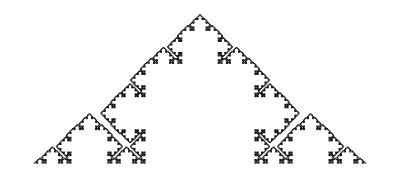

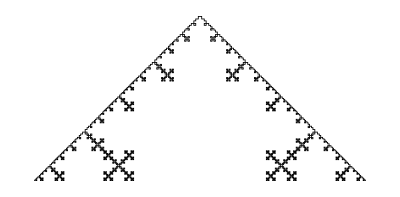

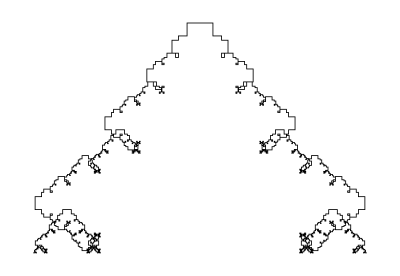

In [41]:
for mp in [0.2, 0.25, 0.33, 0.4, 0.6]:
    bot = Finch()
    top_hat(bot, 200, 5, extrude_factor=0.3, middle_percent=mp)
    bot.show()

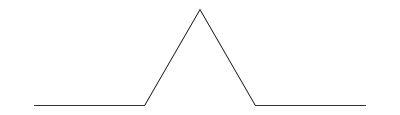

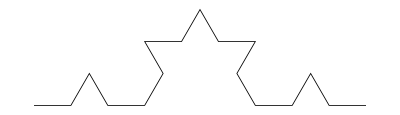

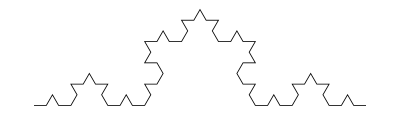

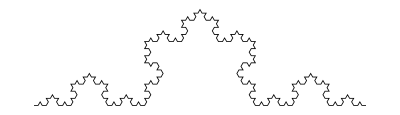

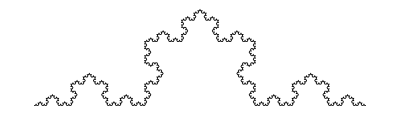

In [43]:
def pointy_hat(bot, length: float, angle: int = 60, steps: int = 3):
    if not steps:
        bot.setMove('F', length, 1)
    else:
        third = length / 3

        pointy_hat(bot, third, angle, steps-1)
        bot.setTurn('L', angle, 1)
        pointy_hat(bot, third, angle, steps-1)
        bot.setTurn('R', angle*2, 1)
        pointy_hat(bot, third, angle, steps-1)
        bot.setTurn('L', angle, 1)
        pointy_hat(bot, third, angle, steps-1)

for steps in [1, 2, 3, 4, 5]:
    bot = Finch()
    pointy_hat(bot, 200, 60, steps)
    bot.show()

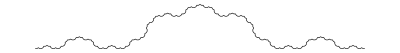

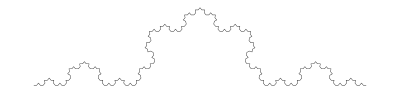

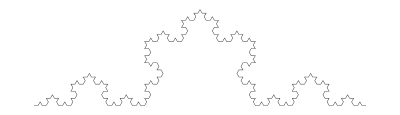

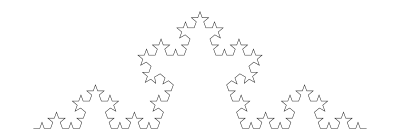

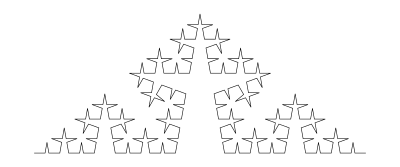

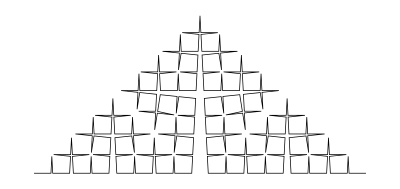

In [45]:
for angle in [30, 50, 60, 70, 80, 87]:
    bot = Finch()
    pointy_hat(bot, 200 * (angle/40)**2, angle, 4)
    bot.show()